In [12]:
import matplotlib.pyplot as plt
import json
import pandas as pd

# import JSON
with open('Postgres_results.json') as json_file:
    results = json.load(json_file)

In [13]:
# Create DataFrame
df = pd.DataFrame(results)

In [14]:
# Drop the QueryString, as this column has no value for the statistical analysis. It was recorded for historization purposes and to make the results traceable
df = df.drop(columns='QueryString')
# Queries that have returned 0 rows might skewers the results, as there is no guarantee, the Query was actually executed. Therefore these results are dropped.
df = df[df.NumberOfRowsReturned != 0]
# Drop Queries for Range 80, as they don't exist for every Amount of RowsInDataBase
df = df[df.QueryType != 'Range, 80']
df

,QueryType,Minimum,Maximum,Median,Mean,StandardDeviation,NumberOfRowsReturned,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,NumberOfRuns
0,Point,2879.0,3283.0,3003.0,3068.0000,165.5415,1,GP_Gen5_2,10000000,128.79,5
1,Point,2758.0,3293.0,2847.0,2947.2000,210.9246,1,GP_Gen5_2,10000000,128.79,5
2,Point,2693.0,2849.0,2801.0,2788.6000,57.6047,1,GP_Gen5_2,10000000,128.79,5
3,"Range, 10",2596.0,2648.0,2619.0,2620.8000,23.0152,250,GP_Gen5_2,10000000,128.79,5
4,"Range, 10",2545.0,2660.0,2638.0,2617.0000,48.5489,250,GP_Gen5_2,10000000,128.79,5
...,...,...,...,...,...,...,...,...,...,...,...
135,"Range, 50",54116.0,59379.0,56433.0,56642.6667,2637.7571,12500,GP_Gen5_2,100000000,128.79,3
136,"Range, 50",54795.0,57317.0,56003.0,56038.3333,1261.3712,12500,GP_Gen5_2,100000000,128.79,3
137,"Range, 50",54256.0,56023.0,55196.0,55158.3333,884.1020,12500,GP_Gen5_2,100000000,128.79,3
141,Aggregate,50875.0,58117.0,55179.0,54723.6667,3642.4082,1,GP_Gen5_2,100000000,128.79,3


In [15]:
# Next step is to aggregate the QueryTypes for each Scale
# Before there were 3 Queries, for each Querytype for each Databasesize, for each RowsInDataBase. Now there is only 1 aggregated.
df = df.groupby(['QueryType','DatabaseSize', 'RowsInDataBase','EstimatedMonthlyCosts'], as_index=False).agg(
    {
         'Median': 'mean',
         'Mean': 'mean',
         'Maximum': 'max',
         'Minimum': 'min',
    }
)
df

,QueryType,DatabaseSize,RowsInDataBase,EstimatedMonthlyCosts,Median,Mean,Maximum,Minimum
0,Aggregate,GP_Gen5_16,1000000,1010.78,171.000000,174.200000,191.0,159.0
1,Aggregate,GP_Gen5_16,10000000,1010.78,444.333333,445.800000,462.0,433.0
2,Aggregate,GP_Gen5_16,100000000,1010.78,18766.000000,18790.333350,18934.0,18661.0
3,Aggregate,GP_Gen5_2,1000000,128.79,270.333333,272.400000,319.0,252.0
4,Aggregate,GP_Gen5_2,10000000,128.79,2671.666667,2659.933333,2752.0,2594.0
5,Aggregate,GP_Gen5_2,100000000,128.79,54832.000000,54952.500000,60110.0,50875.0
6,Aggregate,GP_Gen5_8,1000000,506.78,157.333333,172.200000,360.0,150.0
7,Aggregate,GP_Gen5_8,10000000,506.78,445.000000,448.133333,486.0,431.0
8,Aggregate,GP_Gen5_8,100000000,506.78,23014.500000,22999.000000,23116.0,22905.0
9,Point,GP_Gen5_16,1000000,1010.78,173.666667,182.066667,241.0,167.0


In [16]:
# Get Subsets on which to create Plots
df1 = df.copy(deep=True)
df_index_RowsInDB = df1.set_index('RowsInDataBase', inplace=True)
df_index_RowsInDB = df1.loc[[1000000, 10000000, 100000000], :]
df_GP_Gen5_2 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_2']
df_GP_Gen5_8 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_8']
df_GP_Gen5_16 = df_index_RowsInDB[df_index_RowsInDB.DatabaseSize == 'GP_Gen5_16']


df_index_DBSize = df.set_index('EstimatedMonthlyCosts', inplace=True)
df_index_DBSize = df.loc[[128.79, 506.78, 1010.78], :]
df_1Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 1000000]
df_10Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 10000000]
df_100Mil = df_index_DBSize[df_index_DBSize.RowsInDataBase == 100000000]


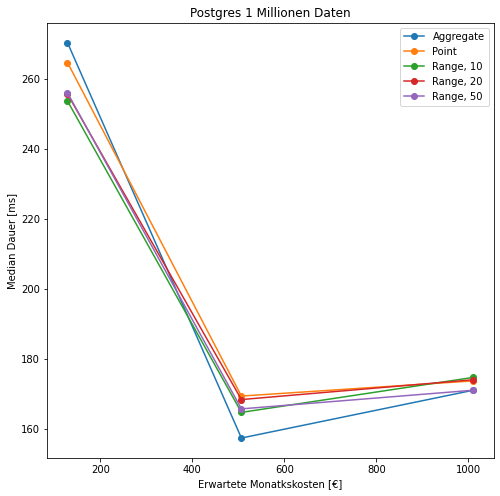

In [17]:
df_1Mil.groupby('QueryType')['Median'].plot(marker='o', legend=True, xlabel='Erwartete Monatkskosten [€]', ylabel='Median Dauer [ms]', figsize=(8,8),  title= 'Postgres 1 Millionen Daten')
plt.savefig('./Plots/Postgres_1Mil.png', bbox_inches='tight')

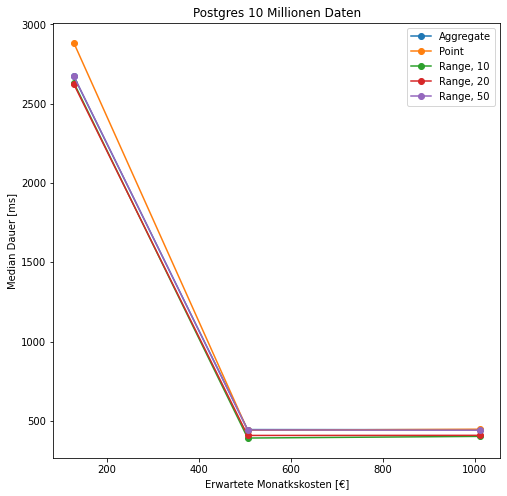

In [18]:
df_10Mil.groupby('QueryType')['Median'].plot(marker='o', legend=True, xlabel='Erwartete Monatkskosten [€]',ylabel='Median Dauer [ms]', figsize=(8,8),  title= 'Postgres 10 Millionen Daten')
plt.savefig('./Plots/Postgres_10Mil.png', bbox_inches='tight')

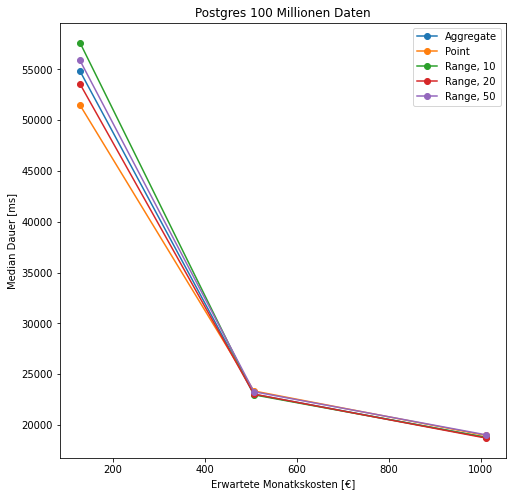

In [19]:
df_100Mil.groupby('QueryType')['Median'].plot(marker='o', legend=True, xlabel='Erwartete Monatkskosten [€]',ylabel='Median Dauer [ms]', figsize=(8,8), title= 'Postgres 100 Millionen Daten')
plt.savefig('./Plots/Postgres_100Mil.png', bbox_inches='tight')

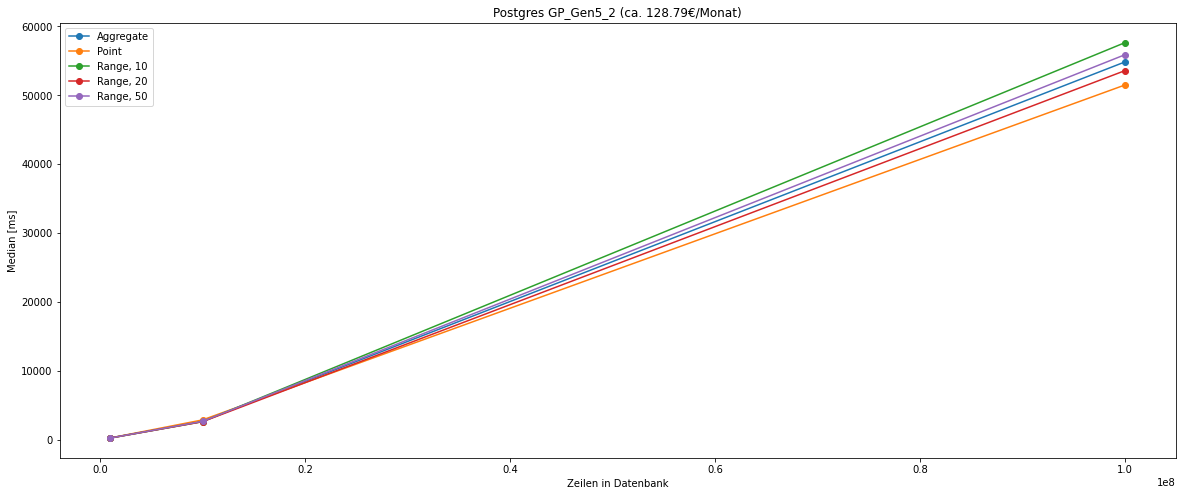

In [20]:
df_GP_Gen5_2.groupby('QueryType')['Median'].plot(marker='o', legend=True, xlabel='Zeilen in Datenbank', ylabel='Median [ms]', figsize=(20,8), title= 'Postgres GP_Gen5_2 (ca. 128.79€/Monat)')
plt.savefig('./Plots/Postgres_GP_Gen5_2.png', bbox_inches='tight')

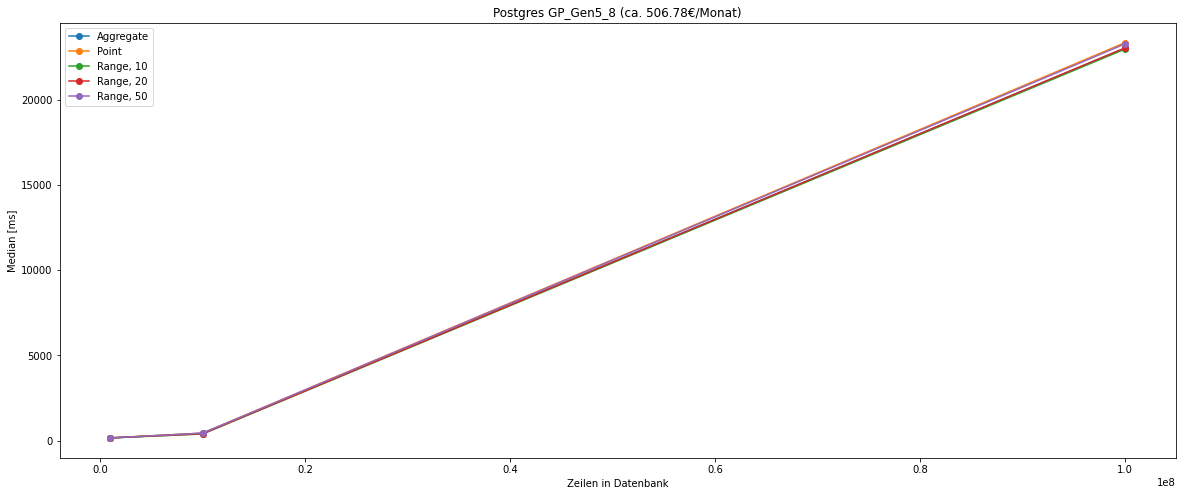

In [21]:
df_GP_Gen5_8.groupby('QueryType')['Median'].plot(marker='o', legend=True, xlabel='Zeilen in Datenbank', ylabel='Median [ms]', figsize=(20,8), title= 'Postgres GP_Gen5_8 (ca. 506.78€/Monat)')
plt.savefig('./Plots/Postgres_GP_Gen5_8.png', bbox_inches='tight')

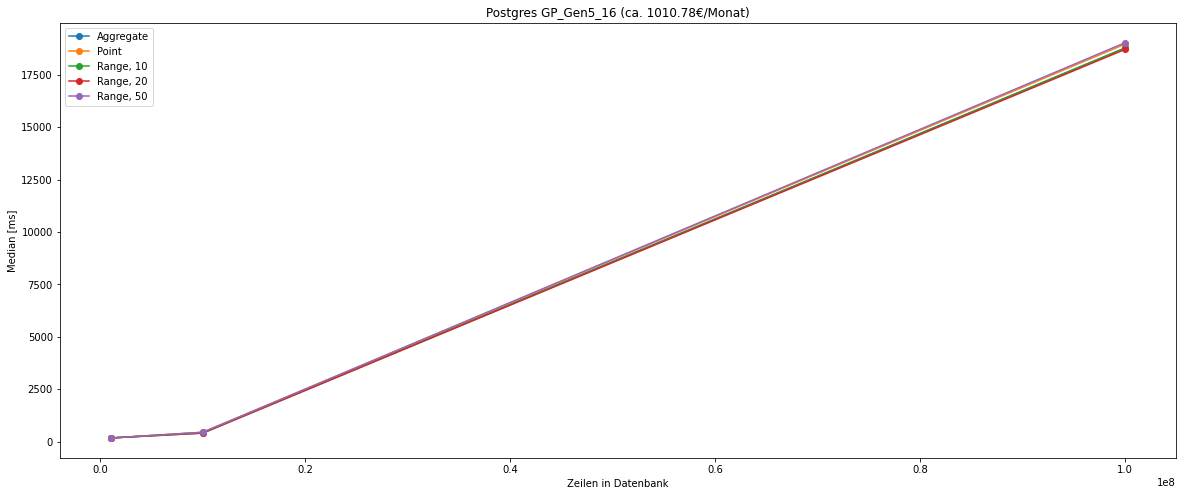

In [22]:
df_GP_Gen5_16.groupby('QueryType')['Median'].plot(marker='o', legend=True, xlabel='Zeilen in Datenbank', ylabel='Median [ms]', figsize=(20,8), title= 'Postgres GP_Gen5_16 (ca. 1010.78€/Monat)')
plt.savefig('./Plots/Postgres_GP_Gen5_16.png', bbox_inches='tight')